In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import sys

In [4]:
# # plate size, mm
# w = h = 10.
# # intervals in x-, y- directions, mm
# dx = dy = 0.1
# # Thermal diffusivity of steel, mm2.s-1
# D = 4.

# Tcool, Thot = 300, 700

# nx, ny = int(w/dx), int(h/dy)

# dx2, dy2 = dx*dx, dy*dy
# dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

# u0 = Tcool * np.ones((nx, ny))
# u = u0.copy()

# # Initial conditions - circle of radius r centred at (cx,cy) (mm)
# r, cx, cy = 2, 5, 5
# r2 = r**2
# for i in range(nx):
#     for j in range(ny):
#         p2 = (i*dx-cx)**2 + (j*dy-cy)**2
#         if p2 < r2:
#             u0[i,j] = Thot

# def do_timestep(u0, u):
#     # Propagate with forward-difference in time, central-difference in space
#     u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
#           (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
#           + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

#     u0 = u.copy()
#     return u0, u

# # Number of timesteps
# nsteps = 101
# # Output 4 figures at these timesteps
# mfig = [0, 10, 50, 100]
# fignum = 0
# fig = plt.figure()
# for m in range(nsteps):
#     u0, u = do_timestep(u0, u)
#     if m in mfig:
#         fignum += 1
#         print(m, fignum)
#         ax = fig.add_subplot(220 + fignum)
#         im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
#         ax.set_axis_off()
#         ax.set_title('{:.1f} ms'.format(m*dt*1000))
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
# cbar_ax.set_xlabel('$T$ / K', labelpad=20)
# fig.colorbar(im, cax=cbar_ax)
# plt.show()

In [5]:
import xgcm
import xarray as xr

In [6]:
def psi_sb(z0,gamma):
    return LAABW/H/gamma*Gamma_ice*np.exp((y+Lchannel+LAABW)/LAABW-1)/(np.exp(1)-2)

In [7]:
def psi_basin(z0,gamma):
    return

In [9]:
#def psi_channel(channelgrid):
     #*np.ones(np.size(channelgrid))

In [11]:
Lchannel=2500 #km
Lbasin=10000 #km
LAABW=100 #km
LNADW=150
Lice=500 #km
dy=50 #km
dz=100 #m
H=5000 #m
Nz=50 
Nchannel=50
Nbasin=200 #200*50=10000 for tracers
Gamma_ice=1.5e-7 #kg m-2 s-1
tau=0.1 #N m-2
rho0=1000 #kg m-3
f=-1e-4 #s-1
ybasin=np.arange(0,10000,50)



T_gamma=2* 86400*14 #2 week relaxation
gamma_iceN=27.9
y_iceN=-2000 #latitude at the Northern edge of ice
gamma_channelN=25.9
y_channelN=0 #latitude at the Northern edge of the channel
psi_mean=tau/rho0/f
zgrid_psi=np.ones([1,Nz])
zgrid_psi[0,19:]=np.linspace(1,0,31)




#psi=tw/f/rho0+Ke*S
Zp1=np.arange(0,-H-dz,-dz)
Zl=Zp1[1:]
Zu=Zp1[:-1]
Z=(Zl+Zu)/2

#gamma_sb= -Lchannel+Z*LAABW/H#southern boundary
#psi_sb= LAABW/H/#southern boundary
#channelgrid=np.zeros(Nchannel,Nz)
#gamma_surf=
#Gamma_surf=Gamma_ice*np.exp((y+Lchannel+LAABW)/LAABW-1)/(np.exp(1)-2)
gamma_channelgrid=np.zeros([Nchannel,Nz])
yid_ice=np.arange(0,10,1)
yid_channel_no_ice=np.arange(10,51,1)

zgrid_psi=np.ones([1,Nz])
zgrid_psi[0,19:]=np.linspace(1,0,31)
zgrid_psi

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.96666667, 0.93333333, 0.9       , 0.86666667, 0.83333333,
        0.8       , 0.76666667, 0.73333333, 0.7       , 0.66666667,
        0.63333333, 0.6       , 0.56666667, 0.53333333, 0.5       ,
        0.46666667, 0.43333333, 0.4       , 0.36666667, 0.33333333,
        0.3       , 0.26666667, 0.23333333, 0.2       , 0.16666667,
        0.13333333, 0.1       , 0.06666667, 0.03333333, 0.        ]])

In [12]:
gamma_sample=[25.9,26,27,27.6,27.9,28]
gamma_sample_depth=[0,-200.0,-1000.0,-2000.0,-4000.0,-5000.0]
#w_sample=      [0, 1,1.5 ,1.5,0.5 ,0   , -2 , -4, -6, -8 ,-10, -12, -14 ,-16 ,-17, -16, 0]
#w_sample_depth=[0 ,0.5,0.8 , 1 ,1.4, 1.5, 1.8, 2.1, 2.3 ,2.5, 2.75, 3.1 ,3.5, 4, 4.5, 4.7,5]
#w_sample_depth=[i*-1000 for i in w_sample_depth]
w_sample=      [0, -2,-3 ,-3, -1 ,  -0.5   , -1 , -2, -2    ,   -2 ,-2, -2, -4 ,-6 ,-8.5, -8, 0]
w_sample_depth=[0 ,0.5,0.8 , 1 ,1.4, 1.5, 1.8, 2.1, 2.3 ,2.5, 2.75, 3.1 ,3.5, 4, 4.5, 4.7,5]
w_sample_depth=[i*-1000 for i in w_sample_depth]

fgamma = interp1d(gamma_sample_depth[::-1],gamma_sample[::-1], kind='cubic')
fw = interp1d(w_sample_depth[::-1],w_sample[::-1], kind='cubic')
gamma_basin_init=fgamma(Z)
w_init=fw(Zl)

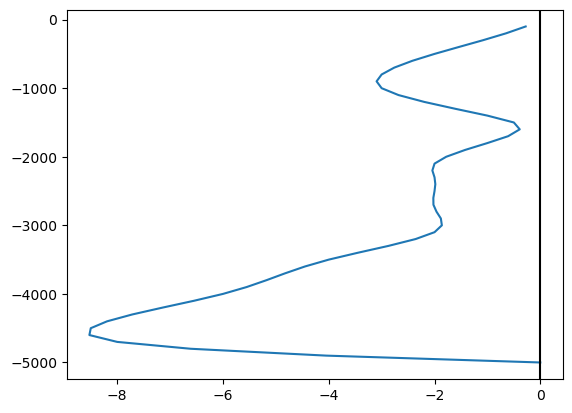

In [13]:
plt.plot(w_init,Zl)
plt.axvline(x=0,color='k')

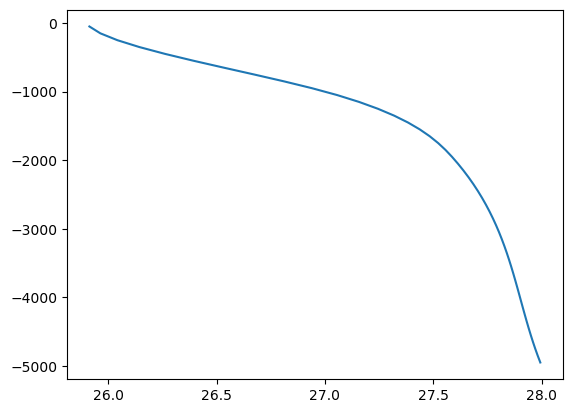

In [14]:
plt.plot(gamma_basin_init,Z)


In [15]:
pgamma_pz_inner=(gamma_basin_init[:-1]-gamma_basin_init[1:])/(Z[:-1]-Z[1:]) #on Z inner
pgamma_pz_lower=np.append(pgamma_pz_inner,0)
pgamma_pz_outer=np.insert(pgamma_pz_lower,0,0)
kdia_outer=np.insert(kdia,0,0)
ppkdiagamma_ppz=(kdia_outer[:-1]*pgamma_pz_outer[:-1]-kdia_outer[1:]*pgamma_pz_outer[1:])/(Zp1[:-1]-Zp1[1:])  #on Z center
ppkdiagamma_ppz_inner=(ppkdiagamma_ppz[:-1]+ppkdiagamma_ppz[1:])/2
w_inner=ppkdiagamma_ppz_inner/pgamma_pz_inner



NameError: name 'kdia' is not defined

In [16]:
plt.plot(w_inner)

NameError: name 'w_inner' is not defined

In [17]:
#np.r_[np.zeros(1,Nbasin),basin_streamfunc]
basin_streamfunc_zouter=np.c_[np.zeros(Nbasin),basin_streamfunc]
basin_streamfunc_zouter.shape

NameError: name 'basin_streamfunc' is not defined

In [18]:
v_basin_grid.shape
w_basin_grid.shape
v_basin_grid
kdia.shape

NameError: name 'v_basin_grid' is not defined

In [19]:
w_basin_grid[-1,-2]
v_basin_grid[-1,-1]
print(v_basin_grid[-1,-1]*dz)
print(w_basin_grid[-1,-2]*dy*1000)
advy_1[1:,:]=np.where(v_basin_grid[1:,:]<0, v_basin_grid[1:,:],0)
advy_2=np.where(v_basin_grid>0, v_basin_grid,0)
#advy=v_basin_grid*tracer_yface
advy=advy_1+advy_2
advy=advy
advy=np.vstack((advy,np.zeros([1,Nz])))
advz_1=np.where(w_basin_grid>0,w_basin_grid,0)
advz_2[:,:-1]=np.where(w_basin_grid[:,:-1]<0,w_basin_grid[:,:-1],0)
advz=advz_1+advz_2
advz=advz

divy=(-advy[2:,1:]+advy[1:-1,1:])/dy/1000
divz=-(-advz[1:,:-1]+advz[1:,1:])/dz


NameError: name 'w_basin_grid' is not defined

In [20]:
np.set_printoptions(threshold=sys.maxsize)
print("divy:",divy[:,1])
print("divz:",divz[:,1])
print("divy+divz:",(divy+divz)[:,1])

NameError: name 'divy' is not defined

In [21]:
fluxy1=np.vstack((fluxy,np.ones([1,Nz])))
fluxy1.shape
fluxz1=np.hstack((fluxz,np.ones([Nbasin,1])))
fluxz1.shape

NameError: name 'fluxy' is not defined

In [22]:
a = np.arange(10)
a
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
np.where(a < 5, a, 10*a)
array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

NameError: name 'array' is not defined

In [23]:
kv0=kv


NameError: name 'kv' is not defined

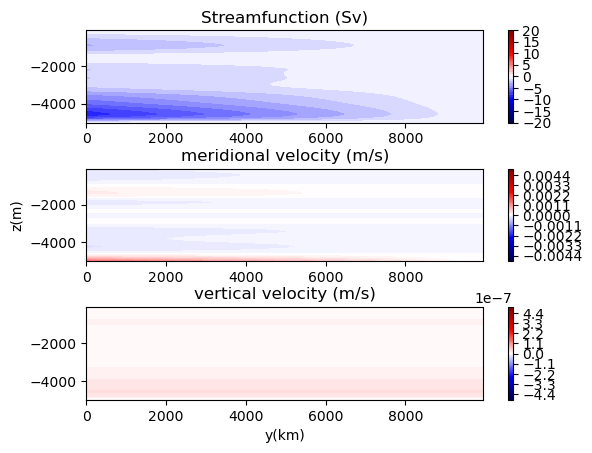

In [24]:
ksurf=1e-5
kdeep=5e-4
Zsill=-2000 #m
Hsill=750 #m
kv=1e-4
kdia=0.5*(ksurf+kdeep)+0.5*(ksurf-kdeep)*np.tanh((Zl-Zsill)/Hsill)
pgamma_pz=(gamma_basin_init[:-1]-gamma_basin_init[1:])/(Z[:-1]-Z[1:]) #on Z inner
pgamma_pz_lower=np.append(pgamma_pz,0)
pgamma_pz_outer=np.insert(pgamma_pz_lower,0,0)
ppgamma_ppz=(pgamma_pz_outer[:-1]-pgamma_pz_outer[1:])/(Zp1[:-1]-Zp1[1:])  #on Z center
basin_width=28000 #km
w_inner=-kdia[:-1]*pgamma_pz/((gamma_basin_init[:-1]+gamma_basin_init[1:])/2)
w=np.append(w_inner,0)
w=w_init*1e6/basin_width/Lbasin/1000/1000
w_basin_grid=-np.tile(w,[Nbasin,1])
 #km
w_transport=w_basin_grid*basin_width*dy*1000*1000

basin_streamfunc=-np.cumsum(w_transport[::-1,:],axis=0)[::-1,:]
basin_streamfunc_zouter=np.c_[np.zeros(Nbasin),basin_streamfunc]
v_basin_grid=-(basin_streamfunc_zouter[:,:-1]-basin_streamfunc_zouter[:,1:])/(Zp1[:-1]-Zp1[1:])/basin_width/1000

fig=plt.figure(0)
plt.subplot(3,1,1)
plt.contourf(ybasin,Zl,basin_streamfunc.T/1e6,cmap='seismic',levels=np.arange(-20,20.5,1))

#plt.contourf(ybasin,Zl,w_transport.T)
plt.colorbar()
plt.title('Streamfunction (Sv)')
plt.subplot(3,1,2)


#plt.contourf(ybasin,Zl,w_transport.T)
#plt.colorbar()
plt.contourf(ybasin,Zl,v_basin_grid.T,cmap='seismic',levels=np.arange(-0.005,0.0051,0.0001))
plt.colorbar()
plt.ylabel('z(m)')
plt.title('meridional velocity (m/s)')
plt.subplot(3,1,3)


#plt.contourf(ybasin,Zl,w_transport.T)
#plt.colorbar()
plt.contourf(ybasin,Zl,w_basin_grid.T,cmap='seismic',levels=np.arange(-0.0000005,0.00000051,0.00000001))
plt.colorbar()
plt.xlabel('y(km)')
plt.title('vertical velocity (m/s)')
fig.subplots_adjust(wspace=0.5,hspace=0.5)

In [25]:
ages=[1000]

Text(0, 0.5, 'z')

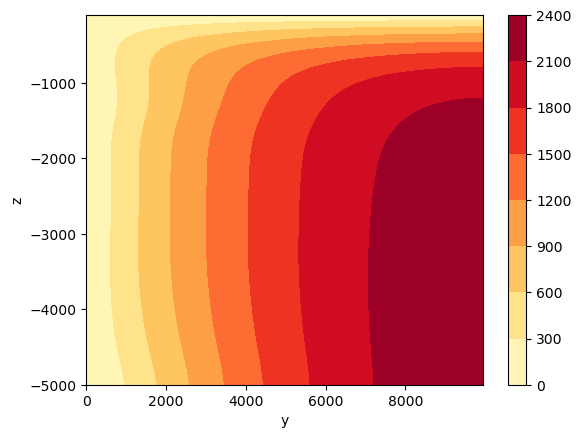

In [26]:
#dt=86400*10#s
#T=31104000*300#00#31104000*5000 #years->second
dt=86400*20
T=31104000*5000
Nt=T//dt
kiso=500#-500#m2/s
#kv=kv0
#kdia=0
tracer=np.zeros([Nbasin,Nz])
#tracer[0,:]=np.linspace(0,400*31104000,Nz)
tracer_source=np.ones([Nbasin,Nz])
tracer_yface=np.zeros([Nbasin,Nz])
tracer_zface=np.zeros([Nbasin,Nz])
grad_y=np.zeros([Nbasin,Nz])
grad_z=np.zeros([Nbasin,Nz])
advy_1=np.zeros([Nbasin,Nz])
advy_2=np.zeros([Nbasin,Nz])
advz_1=np.zeros([Nbasin,Nz])
advz_2=np.zeros([Nbasin,Nz])
##write a 2D solver here


for it in range(0,Nt):
    #advection
    tracer_yface[1:,:]=(tracer[:-1,:]+tracer[1:,:])/2
    tracer_zface[:,:-1]=(tracer[:,:-1]+tracer[:,1:])/2 #w grid is on the lower Z surface
    
    advy_1[1:,:]=np.where(v_basin_grid[1:,:]<0, tracer[:-1,:]*v_basin_grid[1:,:],0)
    advy_2=np.where(v_basin_grid>0, tracer*v_basin_grid,0)
    advy=v_basin_grid*tracer_yface
    advy=advy_1+advy_2
    advy=advy #on southern grid face
    advz_1=np.where(w_basin_grid>0,tracer*w_basin_grid,0)
    advz_2[:,:-1]=np.where(w_basin_grid[:,:-1]<0,tracer[:,1:]*w_basin_grid[:,:-1],0)
    advz=advz_1+advz_2
    advz=advz #on lower grid face
    #advz=advz*
    #advz=w_basin_grid*tracer_zface
    
    #advy=advy/1000
    #advz=advz*1000000
    #diffusion
    grad_y[1:,:]=(tracer[1:,:]-tracer[:-1,:])/dy/1000
    grad_z[:,:-1]=-(tracer[:,1:]-tracer[:,:-1])/dz #w grid is on the lower Z surface

    diffy=-kiso*grad_y
    diffz=-kdia*grad_z

    fluxy=advy+diffy 
    #fluxy=fluxy
    fluxz=advz+diffz
    
    fluxy=np.vstack((fluxy,np.zeros([1,Nz])))
    #fluxz=np.hstack((np.ones([Nbasin,1]),fluxz))
    tracer[1:,1:]=tracer[1:,1:]+dt*((-fluxy[2:,1:]+fluxy[1:-1,1:])/dy/1000+(-fluxz[1:,:-1]+fluxz[1:,1:])/dz+tracer_source[1:,1:])

plt.contourf(ybasin,Zl,tracer.T/31104000,cmap=plt.cm.YlOrRd)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('z')
#print(tracer[0:4,:])
#print(diffy[0:4,:])

In [18]:
age_kiso500=tracer

Text(0.5, 1.0, 'age(year),5xkdiadeep')

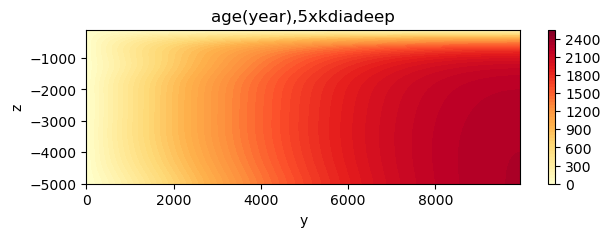

In [24]:
fig=plt.figure(figsize=(7,2))
plt.contourf(ybasin,Zl,tracer.T/31104000,cmap=plt.cm.YlOrRd,levels=np.arange(0,2600,50))
plt.colorbar()
plt.xlabel('y')
plt.ylabel('z')
plt.title('age(year),5xkdiadeep')

Text(0.5, 1.0, 'age(year)')

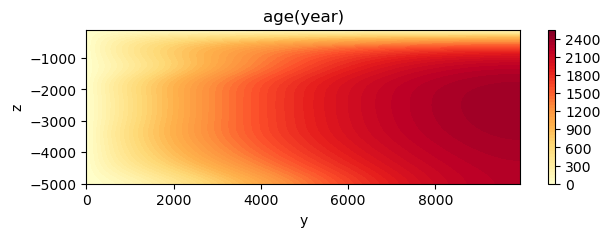

In [19]:
fig=plt.figure(figsize=(7,2))
plt.contourf(ybasin,Zl,tracer.T/31104000,cmap=plt.cm.YlOrRd,levels=np.arange(0,2600,50))
plt.colorbar()
plt.xlabel('y')
plt.ylabel('z')
plt.title('age(year)')

In [599]:
fluxz.shape
fluxy.shape

(201, 50)

In [467]:
dV=np.ones([Nbasin,Nz])*basin_width*1000*dy*1000
dV.shape
Vint.shape

(200, 50)

Text(0.5, 0.98, 'kiso=500')

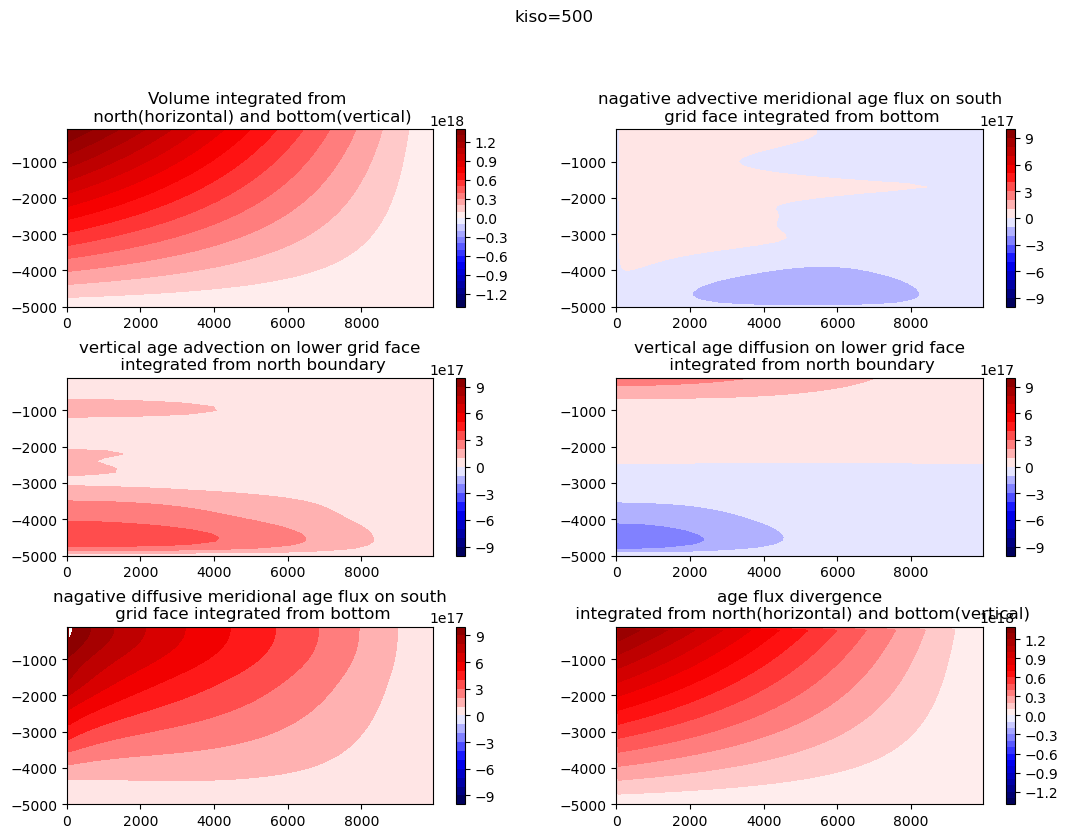

In [619]:
fig=plt.figure(figsize=(13,12))
plt.subplot(4,2,3)
plt.contourf(ybasin,Zl,(np.cumsum(advz[::-1,:],axis=0)[::-1,:]*basin_width*dy*1000*1000).T,cmap='seismic',levels=np.arange(-10e17,10.1e17,1e17))
plt.colorbar()
plt.title('vertical age advection on lower grid face\n integrated from north boundary')

plt.subplot(4,2,4)
plt.contourf(ybasin,Zl,(np.cumsum(diffz[::-1,:],axis=0)[::-1,:]*basin_width*dy*1000*1000).T,cmap='seismic',levels=np.arange(-10e17,10.1e17,1e17))
plt.colorbar()
plt.title('vertical age diffusion on lower grid face\n integrated from north boundary')

plt.subplot(4,2,2)
plt.contourf(ybasin,Zl,-np.cumsum(fluxy[:-1,::-1]*basin_width*1000*dz,axis=1)[:,::-1].T,cmap='seismic',levels=np.arange(-10e17,10.1e17,1e17))
plt.colorbar()
plt.title('nagative zonal age flux on south grid face\n integrated from bottom')

plt.subplot(4,2,2)
plt.contourf(ybasin,Zl,-np.cumsum(advy[:,::-1]*basin_width*1000*dz,axis=1)[:,::-1].T,cmap='seismic',levels=np.arange(-10e17,10.1e17,1e17))
plt.colorbar()
plt.title('nagative advective meridional age flux on south\n grid face integrated from bottom')

plt.subplot(4,2,5)
plt.contourf(ybasin,Zl,-np.cumsum(diffy[:,::-1]*basin_width*1000*dz,axis=1)[:,::-1].T,cmap='seismic',levels=np.arange(-10e17,10.1e17,1e17))
plt.colorbar()
plt.title('nagative diffusive meridional age flux on south\n grid face integrated from bottom')

plt.subplot(4,2,1)
dV=np.ones([Nbasin,Nz])*basin_width*1000*dy*1000*dz
Vint=np.cumsum((np.cumsum(dV[::-1,:],axis=0)[::-1,:])[:,::-1],axis=1)[:,::-1]
plt.contourf(ybasin,Zl,Vint.T,cmap='seismic',levels=np.arange(-14e17,14.1e17,1e17))
plt.colorbar()
plt.title('Volume integrated from \n north(horizontal) and bottom(vertical)')

plt.subplot(4,2,6)
#dV=np.ones([Nbasin,Nz])*basin_width*1000*dy*1000*dz
#Vint=np.cumsum((np.cumsum(dV[::-1,:],axis=0)[::-1,:])[:,::-1],axis=1)[:,::-1]
cumfluxy=np.cumsum(fluxy[:-1,::-1]*basin_width*1000*dz,axis=1)[:,::-1]
cumfluxz=np.cumsum(fluxz[::-1,:],axis=0)[::-1,:]*basin_width*dy*1000*1000
cumfluxz=np.hstack((np.zeros([Nbasin,1]),cumfluxz[:,:-1]))
plt.contourf(ybasin,Zl,(cumfluxz-cumfluxy).T,cmap='seismic',levels=np.arange(-14e17,14.1e17,1e17))
plt.colorbar()
plt.title('age flux divergence\n integrated from north(horizontal) and bottom(vertical)')
fig.subplots_adjust(wspace=0.2,hspace=0.4)

#plt.subplot(4,3,7)
#plt.contourf(ybasin,Zl,( Vint+np.cumsum(advy[:,::-1]*basin_width*1000*dz,axis=1)[:,::-1]).T,cmap='seismic',levels=np.arange(-14e17,14.1e17,1e17))
#plt.colorbar()

plt.suptitle('kiso=500')

4025.0 -2000


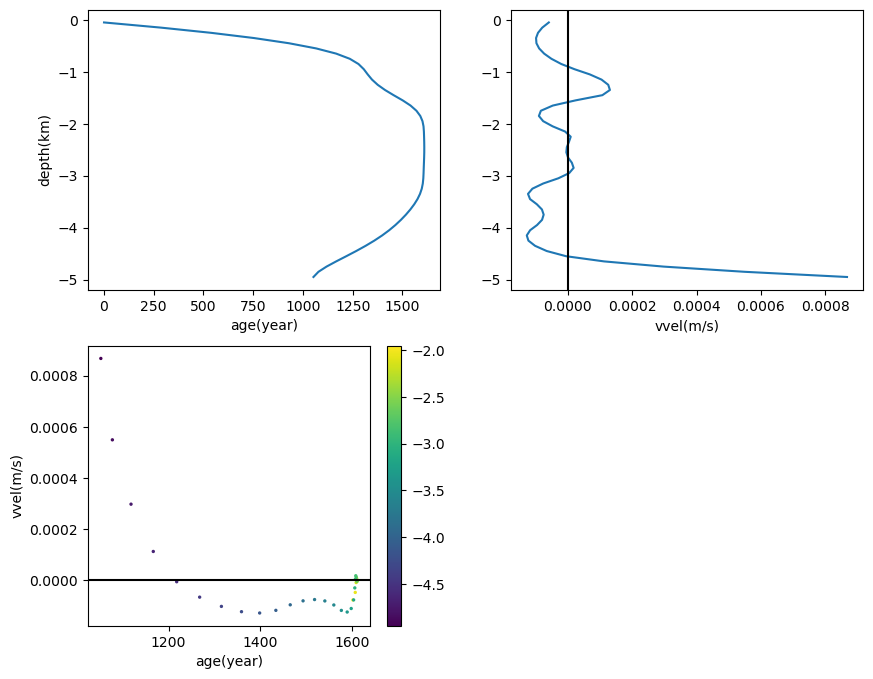

In [579]:
print(ybasin[80]+dy/2,Zl[19])
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(tracer[80,:]/31104000,Z/1000)
plt.xlabel('age(year)')
plt.ylabel('depth(km)')
plt.subplot(2,2,2)
plt.plot(v_basin_grid[80,:],Z/1000)
plt.xlabel('vvel(m/s)')
plt.axvline(x=0,color='black')
plt.subplot(2,2,3)
plt.scatter(tracer[80,19:]/31104000,v_basin_grid[80,19:],s=2,c=Z[19:]/1000)
plt.colorbar()
plt.xlabel('age(year)')
plt.ylabel('vvel(m/s)')
plt.axhline(y=0,color='black')
fig.subplots_adjust(wspace=0.2,hspace=0.2)


In [244]:
a = np.arange(10)

np.where(a < 5, a*10,0)


array([ 0, 10, 20, 30, 40,  0,  0,  0,  0,  0])

In [503]:
print(ybasin)

[   0   50  100  150  200  250  300  350  400  450  500  550  600  650
  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350
 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050
 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750
 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450
 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150
 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850
 4900 4950 5000 5050 5100 5150 5200 5250 5300 5350 5400 5450 5500 5550
 5600 5650 5700 5750 5800 5850 5900 5950 6000 6050 6100 6150 6200 6250
 6300 6350 6400 6450 6500 6550 6600 6650 6700 6750 6800 6850 6900 6950
 7000 7050 7100 7150 7200 7250 7300 7350 7400 7450 7500 7550 7600 7650
 7700 7750 7800 7850 7900 7950 8000 8050 8100 8150 8200 8250 8300 8350
 8400 8450 8500 8550 8600 8650 8700 8750 8800 8850 8900 8950 9000 9050
 9100 9150 9200 9250 9300 9350 9400 9450 9500 9550 9600 9650 9700 9750
 9800 

In [61]:
basin_grid=np.zeros([Nbasin,Nz])
diapycnal_trans=kv*


In [64]:
gamma_basin_init_xr=xr.DataArray(gamma_basin_init, coords=[Z], dims=["Z"])
ds = xr.Dataset(
        coords={
            "Z": (
                ["Z"],
                Z,
               {"axis": "Z"},
            ),
            "Zp1": (
                ["Zp1"],
                Zp1,
                {"axis": "Z", "c_grid_axis_shift": (-0.5, 0.5)},
            ),
        }
    )


In [65]:
gamma_basin_init_xr
ds

<xarray.DataArray (Z: 50)>
array([25.925 , 25.975 , 26.0625, 26.1875, 26.3125, 26.4375, 26.5625,
       26.6875, 26.8125, 26.9375, 27.03  , 27.09  , 27.15  , 27.21  ,
       27.27  , 27.33  , 27.39  , 27.45  , 27.51  , 27.57  , 27.6075,
       27.6225, 27.6375, 27.6525, 27.6675, 27.6825, 27.6975, 27.7125,
       27.7275, 27.7425, 27.7575, 27.7725, 27.7875, 27.8025, 27.8175,
       27.8325, 27.8475, 27.8625, 27.8775, 27.8925, 27.905 , 27.915 ,
       27.925 , 27.935 , 27.945 , 27.955 , 27.965 , 27.975 , 27.985 ,
       27.995 ])
Coordinates:
  * Z        (Z) float64 -50.0 -150.0 -250.0 ... -4.75e+03 -4.85e+03 -4.95e+03